<a href="https://colab.research.google.com/github/bhadaur1/Chollet/blob/master/Chollet_Chap3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear Regression using Boston Housing dataset

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import boston_housing

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(404, 13)

In [4]:
def prepare_data(train_data, train_targets, test_data, test_targets):

  def normalize_dataset(dataset, mean=None, std=None):
    dataset = dataset.copy()
    if mean is None and std is None:
      mean = np.mean(dataset, axis=0)
      std = np.std(dataset, axis=0)
    dataset = (dataset - mean) / std
    return dataset, mean, std

  x_train, train_mean, train_std = normalize_dataset(train_data)
  y_train = train_targets.copy()

  x_test, _, _ = normalize_dataset(test_data, train_mean, train_std)
  y_test = test_targets.copy()

  return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = prepare_data(train_data, train_targets, test_data, test_targets)

In [5]:
%%time
def model_training(epochs=1):
  from keras import models, layers
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))

  model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['mae'])

  history = model.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_split=0.111)
  results = model.evaluate(x_test, y_test)
  return model, history, results

model, history, test_eval_results = model_training(20)

Epoch 1/20
12/12 [==============================] - 0s 14ms/step - loss: 534.7783 - mae: 21.1474 - val_loss: 432.6478 - val_mae: 19.5214
Epoch 2/20
12/12 [==============================] - 0s 3ms/step - loss: 439.2303 - mae: 18.8392 - val_loss: 345.9803 - val_mae: 17.2209
Epoch 3/20
12/12 [==============================] - 0s 3ms/step - loss: 342.4344 - mae: 16.2461 - val_loss: 260.3404 - val_mae: 14.6744
Epoch 4/20
12/12 [==============================] - 0s 3ms/step - loss: 248.6112 - mae: 13.4781 - val_loss: 175.0353 - val_mae: 11.7417
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 164.4886 - mae: 10.6317 - val_loss: 106.0877 - val_mae: 8.7136
Epoch 6/20
12/12 [==============================] - 0s 2ms/step - loss: 103.3019 - mae: 8.1988 - val_loss: 66.1725 - val_mae: 6.8951
Epoch 7/20
12/12 [==============================] - 0s 2ms/step - loss: 71.1664 - mae: 6.6016 - val_loss: 44.0382 - val_mae: 5.6538
Epoch 8/20
12/12 [==============================] - 0s 

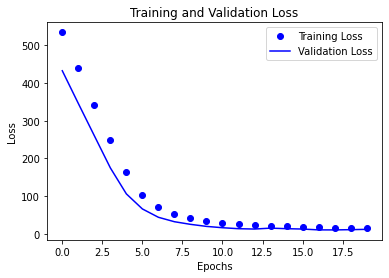

In [6]:
def plot_loss(history):

  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  epochs = history.epoch

  plt.plot(epochs, loss_values, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

plot_loss(history)


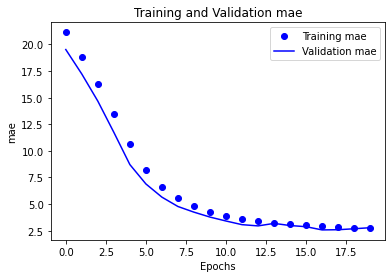

In [7]:
def plot_mae(history):

  history_dict = history.history
  mae_values = history_dict['mae']
  val_mae_values = history_dict['val_mae']
  epochs = history.epoch

  plt.plot(epochs, mae_values, 'bo', label='Training mae')
  plt.plot(epochs, val_mae_values, 'b', label='Validation mae')
  plt.title('Training and Validation mae')
  plt.xlabel('Epochs')
  plt.ylabel('mae')
  plt.legend()

  plt.show()

plot_mae(history)


In [8]:
test_eval_results

[22.9215030670166, 3.530773162841797]

In [14]:
model.predict(x_test)[1], y_test[1]

(array([16.660198], dtype=float32), 18.8)